In [1]:
%matplotlib inline  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%%time

# Load S&P 500 dataset over a 5 year period from Yahoo Finance
df = pd.read_csv('SP500.csv')

CPU times: user 15.2 ms, sys: 8.28 ms, total: 23.5 ms
Wall time: 31.4 ms


## A. Data Wrangling

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-05-05,1879.449951,1885.510010,1866.770020,1884.660034,1884.660034,2733730000
1,2014-05-06,1883.689941,1883.689941,1867.719971,1867.719971,1867.719971,3327260000
2,2014-05-07,1868.530029,1878.829956,1859.790039,1878.209961,1878.209961,3632950000
3,2014-05-08,1877.390015,1889.069946,1870.050049,1875.630005,1875.630005,3393420000
4,2014-05-09,1875.270020,1878.569946,1867.020020,1878.479980,1878.479980,3025020000


In [4]:
# Check for NaN value

df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

#### No NaN value was found in this dataset. 


#### Convert 'Date' to datetime object
#### Add day, month, year to the dataframe



In [5]:
df.Date = pd.to_datetime(df.Date) #convert 'date' to DateTime object
df['day'], df['month'], df['year'] = df.Date.dt.weekday_name, df.Date.dt.month, df.Date.dt.year
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year
0,2014-05-05,1879.449951,1885.510010,1866.770020,1884.660034,1884.660034,2733730000,Monday,5,2014
1,2014-05-06,1883.689941,1883.689941,1867.719971,1867.719971,1867.719971,3327260000,Tuesday,5,2014
2,2014-05-07,1868.530029,1878.829956,1859.790039,1878.209961,1878.209961,3632950000,Wednesday,5,2014
3,2014-05-08,1877.390015,1889.069946,1870.050049,1875.630005,1875.630005,3393420000,Thursday,5,2014
4,2014-05-09,1875.270020,1878.569946,1867.020020,1878.479980,1878.479980,3025020000,Friday,5,2014
5,2014-05-12,1880.030029,1897.130005,1880.030029,1896.650024,1896.650024,3005740000,Monday,5,2014
6,2014-05-13,1896.750000,1902.170044,1896.060059,1897.449951,1897.449951,2915680000,Tuesday,5,2014
7,2014-05-14,1897.130005,1897.130005,1885.770020,1888.530029,1888.530029,2822060000,Wednesday,5,2014
8,2014-05-15,1888.160034,1888.160034,1862.359985,1870.849976,1870.849976,3552640000,Thursday,5,2014
9,2014-05-16,1871.189941,1878.280029,1864.819946,1877.859985,1877.859985,3173650000,Friday,5,2014


#### Data Visualization

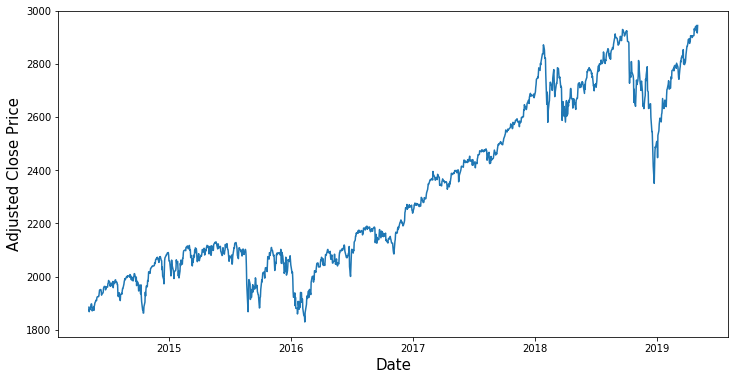

In [6]:
plt.figure(figsize=(12,6))

plt.plot(df['Date'],df['Adj Close'])

plt.ylabel('Adjusted Close Price', fontsize=15)
plt.xlabel('Date', fontsize=15)

plt.show()
plt.close()

## B. Apply Data Storytelling


### Question 1. Is there any effect of different times throughout the year on stock price? How does stock price & volume vary throughout a year?



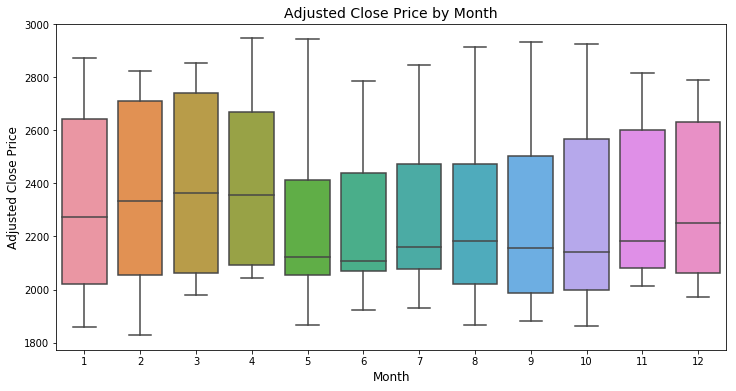

In [7]:
# Plot Adjusted Close Price by Month to detect Seasonality Effect

plt.figure(figsize=(12,6))
sns.boxplot(x = 'month', y = 'Adj Close', data = df)
plt.ylabel('Adjusted Close Price', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title('Adjusted Close Price by Month', fontsize = 14)
plt.show()
plt.close()

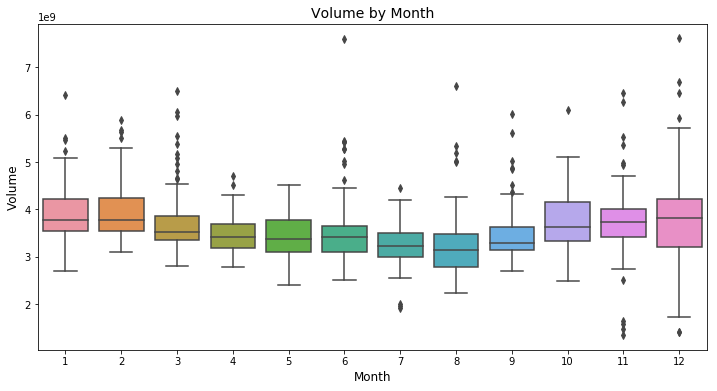

In [8]:
# Plot Volume by Month

plt.figure(figsize=(12,6))
sns.boxplot(x = 'month', y = 'Volume', data = df)
plt.ylabel('Volume', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title('Volume by Month', fontsize = 14)
plt.show()
plt.close()

#### There are big changes in Price & Volume throughout a year. Let's look at some line plots to study the trend

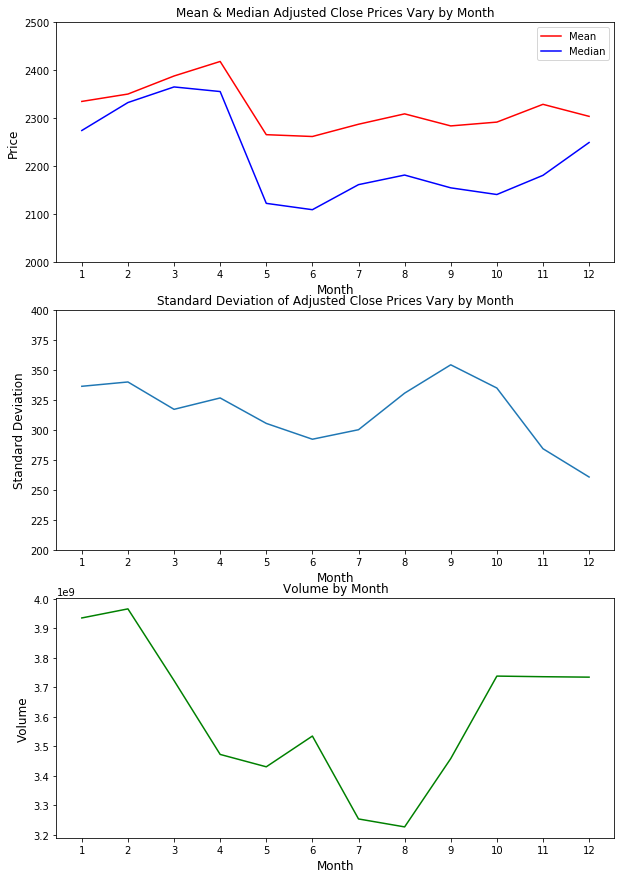

In [9]:
plt.figure(figsize=(10,15))

plt.figure(1)

# Plot Mean and Median by Month
plt.subplot(311)
plt.plot(df.groupby('month')[['Adj Close']].mean(),'red')
plt.plot(df.groupby('month')[['Adj Close']].median(),'blue')

plt.title('Mean & Median Adjusted Close Prices Vary by Month')
plt.xlabel('Month',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.legend(['Mean','Median'])

#plt.axis([1, 12, 2000, 2500])
plt.xticks(np.arange(1, 12.1, 1.0))
plt.yticks(np.arange(2000,2600,100))

# Plot standard deviation by month
plt.subplot(312)
plt.plot(df.groupby('month')[['Adj Close']].std())

plt.title('Standard Deviation of Adjusted Close Prices Vary by Month')
plt.xlabel('Month',fontsize=12)
plt.ylabel('Standard Deviation',fontsize=12)

plt.xticks(np.arange(1, 12.1, 1.0))
plt.yticks(np.arange(200,420,25))


# Plot Volume by month
plt.subplot(313)
plt.plot(df.groupby('month')[['Volume']].mean(),'green')

plt.title('Volume by Month')
plt.xlabel('Month',fontsize=12)
plt.ylabel('Volume',fontsize=12)

plt.xticks(np.arange(1, 12.1, 1.0))

# Show the plots
plt.show()

#### Volume can also be plotted in a bar graph

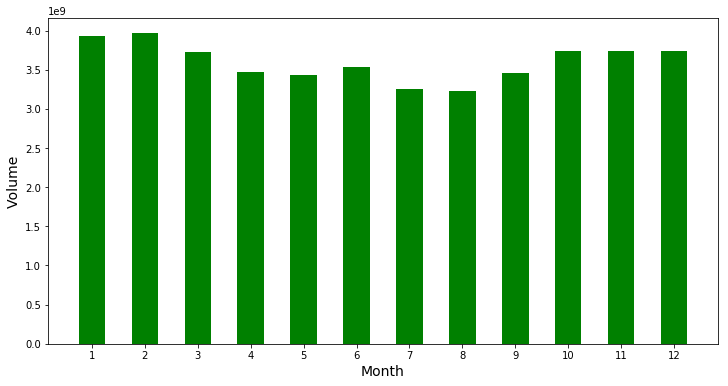

In [10]:
vol = df.groupby('month')[['Volume']].mean()

volbymonth = plt.figure(figsize=(12,6))

axis = volbymonth.add_subplot(1,1,1)
axis.bar(x=vol.index, height=vol.Volume, width = 0.5, color='green')

plt.ylabel('Volume',fontsize = 14)
plt.xlabel('Month',fontsize = 14)
plt.xticks(np.arange(1, 13, 1.0))

plt.show()


In [11]:
from scipy import stats
stats.pearsonr(df['Volume'],df['Adj Close'])

(-0.11034542244648882, 8.730196531925873e-05)

### Answer:


#### * Price is highest in the first 4 months of a year.  It drops in summer, before increases again from October. 


#### * September is the time with highest standard deviation in stock prices. This could be due to the increase of volume , before price starts going up in October. Standard deviation starts going down from October, indicating market is getting more stable and has less fluctuation at that time.


#### * It is noticed that volume starts going down from March after staying high for the first 2 months, and this is followed by the drop of price in May. Volume increases rapidly in September and continues till end of the year, followed by increase of price from October. September is also the time that we observe maximum standard deviation, which could be due to this increase in volume that causes fluctuation in the market.


#### * These results seem to indicate that volume and price are well correlated with each other. However, Pearson Correlation Coefficient between Volume & Adjust Close Price indicates the 2 variables are reversely correlated. This could be explained as volume changes do not have immediate effects on price but a short time after that.
****



### Question 2. What is the effect of different day in a week on stock price?

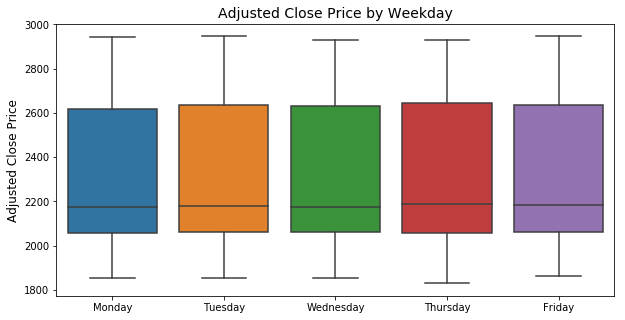

In [12]:
# Plot Adjusted Close Price vs. Weekday

plt.figure(figsize=(10,5))
sns.boxplot(x = 'day', y = 'Adj Close', data = df)

plt.xlabel(None)
plt.ylabel('Adjusted Close Price', fontsize=12)

plt.title('Adjusted Close Price by Weekday', fontsize = 14)
plt.show()

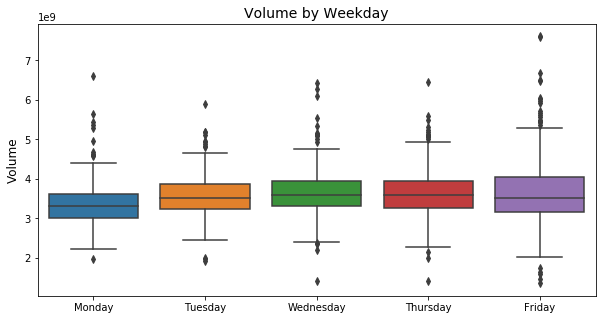

In [13]:
# Plot Volume vs. Weekday

plt.figure(figsize=(10,5))
sns.boxplot(x = 'day', y = 'Volume', data = df)

plt.xlabel(None)
plt.ylabel('Volume', fontsize=12)

plt.title('Volume by Weekday', fontsize = 14)
plt.show()
plt.close()

#### There is not much difference in price throughout a week, however volume seems to increase from Monday to Friday. Let's look at some line plots to study the trend.

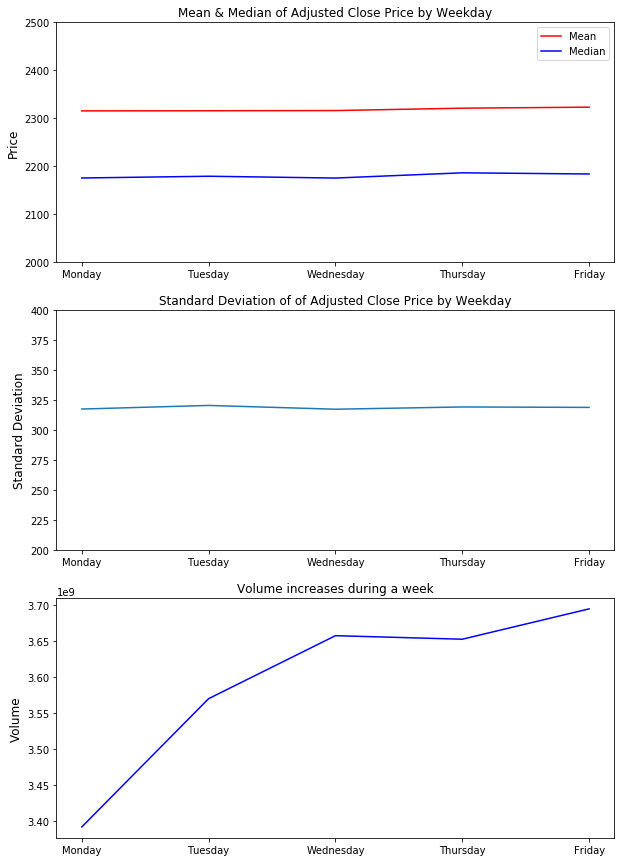

In [14]:
# Create a dictionary to map weekday

sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
sorterIndex = dict(zip(sorter,range(len(sorter))))


# Calculate mean, median, standard deviation and volume by weekday

mean_by_day = df.groupby('day')[['Adj Close']].mean()
median_by_day = df.groupby('day')[['Adj Close']].median()
std_by_day = df.groupby('day')[['Adj Close']].std()

vol_by_day = df.groupby('day')[['Volume']].mean()


# Mapping 

mean_by_day['Day_id'] = mean_by_day.index
mean_by_day['Day_id'] = mean_by_day['Day_id'].map(sorterIndex)
mean_by_day.sort_values('Day_id', inplace=True)

median_by_day['Day_id'] = median_by_day.index
median_by_day['Day_id'] = median_by_day['Day_id'].map(sorterIndex)
median_by_day.sort_values('Day_id', inplace=True)

std_by_day['Day_id'] = std_by_day.index
std_by_day['Day_id'] = std_by_day['Day_id'].map(sorterIndex)
std_by_day.sort_values('Day_id', inplace=True)

vol_by_day['Day_id'] = vol_by_day.index
vol_by_day['Day_id'] = vol_by_day['Day_id'].map(sorterIndex)
vol_by_day.sort_values('Day_id', inplace=True)


# Plotting
plt.figure(figsize=(10,15))

# Plot Mean and Median by Weekday
plt.subplot(311)
plt.plot(mean_by_day['Adj Close'],'red')
plt.plot(median_by_day['Adj Close'],'blue')

plt.title('Mean & Median of Adjusted Close Price by Weekday')
plt.ylabel('Price',fontsize=12)
plt.legend(['Mean','Median'])

plt.yticks(np.arange(2000,2600,100))


# Plot standard deviation by Weekday
plt.subplot(312)
plt.plot(std_by_day['Adj Close'])

plt.title('Standard Deviation of of Adjusted Close Price by Weekday')
plt.ylabel('Standard Deviation',fontsize=12)

plt.yticks(np.arange(200,420,25))


# Plot Volume by Weekday
plt.subplot(313)
plt.plot(vol_by_day['Volume'],'blue')

plt.title('Volume increases during a week')
plt.ylabel('Volume',fontsize=12)

# Show the plots
plt.show()

#### Volume can also be plotted in a bar graph

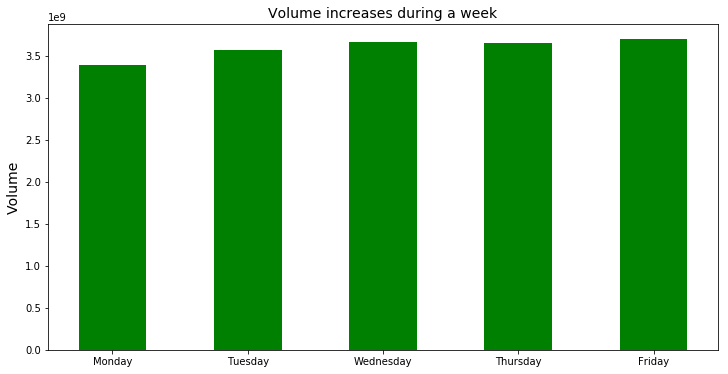

In [15]:
volbyday = plt.figure(figsize=(12,6))

axis = volbyday.add_subplot(1,1,1)
axis.bar(x=vol_by_day.index, height=vol_by_day.Volume, width = 0.5, color='green')

plt.title('Volume increases during a week',fontsize = 14)
plt.ylabel('Volume',fontsize = 14)

plt.show()



### Answer

#### * When averaging by weekday throughout a period of 5 years, there is no significant difference observed in prices between weekdays. This indicates that when price is in an increase or decrease cycle, it usually last for more than 1 week at least. Because of that, price averaging by weekday does not show difference, and that is what we see here.

#### * Volume, however, shows significant change during a week. Volume is at its lowest on Monday, and keeps increasing until Friday. This represents the intensity in the market, low on Monday and high on Friday.

### This is end of chapter 7. Data Storytelling

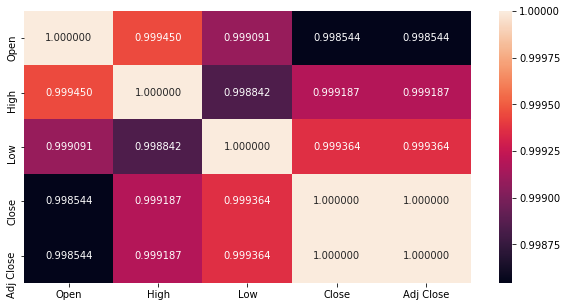

In [16]:
sub_df = df[['Open','High','Low','Close','Adj Close']]#.head(100)
plt.figure(figsize=(10,5))
sns.heatmap(sub_df.corr(),annot=True,fmt="f")

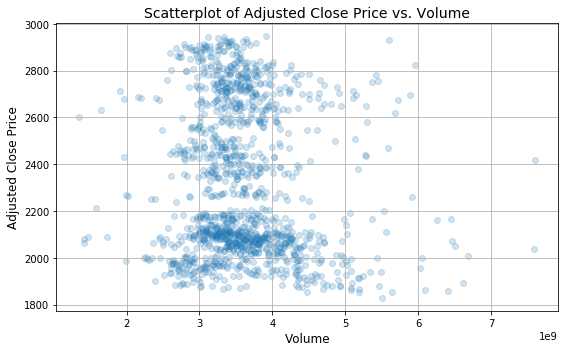

In [17]:
x = df['Volume']
y = df['Adj Close']

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

#ax.set_xlim([0, max(x)])
ax.set_xlabel('Volume', fontsize=12)
ax.set_ylabel('Adjusted Close Price', fontsize=12)
ax.set_title('Scatterplot of Adjusted Close Price vs. Volume', fontsize=14)

ax.grid(True)
fig.tight_layout()

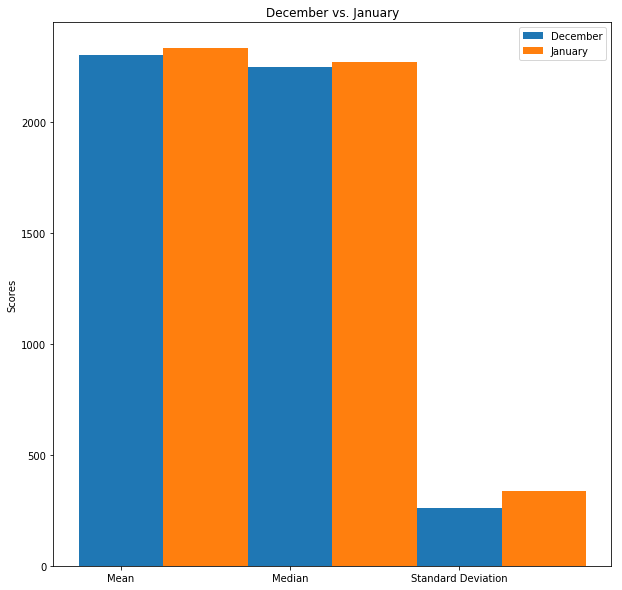

In [18]:
# Let's compare December with January
plt.figure(figsize=(10,10))
N = 3

dec_mean = df[df.month==12]['Adj Close'].mean()
dec_median = df[df.month==12]['Adj Close'].median()
dec_std = df[df.month==12]['Adj Close'].std()
december = (dec_mean,dec_median,dec_std)

jan_mean = df[df.month==1]['Adj Close'].mean()
jan_median = df[df.month==1]['Adj Close'].median()
jan_std = df[df.month==1]['Adj Close'].std()
january = (jan_mean,jan_median,jan_std)

ind = np.arange(N) # the x location for the groups
width = 0.5

dec = plt.bar(ind,december,width)
jan = plt.bar(ind+0.5,january,width)#,bottom=december)

plt.ylabel('Scores')
plt.title('December vs. January')
plt.xticks(ind,('Mean','Median','Standard Deviation'))

plt.legend((dec[0],jan[0]),('December','January'))

plt.show()